# Import

In [1]:
import matplotlib.pyplot as mpl
import scipy.cluster.hierarchy as sch,random,numpy as np,pandas as pd

import yfinance as yf
import pandas as pd
import numpy as np

# Import py file

In [2]:
from HRP import*

# Data

In [3]:
allCrypto = pd.DataFrame()
listCrypto= ['BTC-USD', 'ETH-USD', 'LTC-USD', 'BNB-USD', 'ADA-USD', 'XRP-USD', 'DOGE-USD']
for symb in listCrypto:
    data = pd.DataFrame(yf.Ticker(symb).history(start = "2019-01-01", end = "2021-08-08")['Close']).transpose()
    # data.save_batch_run(symb + '.csv')
    if symb == 'BTC-USD':
      allCrypto = data.copy()
    else:
      allCrypto=allCrypto.append(data)
allCrypto.index = [listCrypto]
allCrypto = allCrypto.transpose()
allCrypto = allCrypto.pct_change(1)

In [4]:
cov, corr = allCrypto.cov(), allCrypto.corr()
#2) compute and plot correl matrix
plotCorrMatrix('HRP3_corr0.png', corr, labels = corr.columns)

C:\Users\RR\AppData\Local\Temp/ipykernel_11548/1181927211.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = sch.linkage(distance, 'single')


(DOGE-USD,)     5.077327
(XRP-USD,)     17.017705
(BNB-USD,)     18.785604
(ADA-USD,)     10.691216
(BTC-USD,)     24.347801
(ETH-USD,)     12.942240
(LTC-USD,)     11.138106
dtype: float64


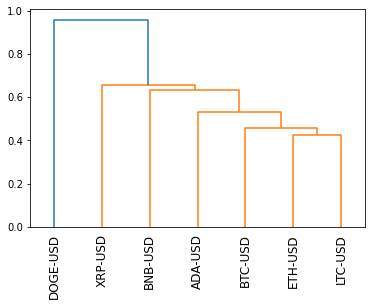

In [5]:
#3) cluster
distance = distanceCorr(corr)
link = sch.linkage(distance, 'single')
sortIx = quasiDiagonal(link)
sortIx = corr.index[sortIx].tolist() # recover labels
dataframe = corr.loc[sortIx, sortIx] # reorder
plotCorrMatrix('HRP3_corr1.png', dataframe, labels = dataframe.columns)
#4) Capital allocation
hrp = recursiveBisection(cov, sortIx)
print(hrp*100)
def llf(id):
    for i in range(10):
      if i == id:
        return listCrypto[i]
sch.dendrogram(link,leaf_label_func=llf, leaf_rotation=90 )
mpl.show()

# Next part

In [7]:
#1) Generate correlated data
numberObs, size0, size1, sigma1 = 10000, 5, 5, .25
data, cols = randomData(numberObs, size0, size1, sigma1)
#print [(j+1,size0+i) for i,j in enumerate(cols,1)]
cov, corr = data.cov(), data.corr()
#2) compute and plot correl matrix
plotCorrMatrix('HRP3_corr0.png', corr, labels = corr.columns)
#3) cluster
dist = distanceCorr(corr)
link = sch.linkage(dist, 'single')
sortIx = quasiDiagonal(link)
sortIx = corr.index[sortIx].tolist() # recover labels
dataframe = corr.loc[sortIx, sortIx] # reorder
plotCorrMatrix('HRP3_corr1.png', dataframe, labels = dataframe.columns)
#4) Capital allocation
hrp = recursiveBisection(cov,sortIx)
print(hrp)

C:\Users\RR\AppData\Local\Temp/ipykernel_11548/463294610.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = sch.linkage(dist, 'single')


8     0.071408
3     0.075961
9     0.125317
2     0.067596
10    0.063236
1     0.109945
7     0.103968
5     0.193357
4     0.097549
6     0.091662
dtype: float64


# MC simulation

In [12]:
hrpMC(numberIters = 10, numberObservations = 520, size0 = 5, size1 = 5, mu0 = 0, sigma0 = 1e-2, sigma1 = .25, lengthSample = 260,testSize = 20)

            0         1         2
IVP  0.334678  0.112009  0.590959
HRP  0.265337  0.070404  0.000000
